## Project1 - Predicting Customer Happiness

### Problem Statement

The objective of this project is to develop a machine learning model to predict customer happiness with a specific focus on identifying unhappy customers, based on survey responses concerning various aspects of our logistics and delivery services. By analyzing attributes related to on-time delivery, order accuracy, pricing, courier satisfaction, and ease of use of our app, we aim to uncover key factors that contribute to customer dissatisfaction. The primary metric of interest will be recall, as our goal is to ensure we accurately identify unhappy customers. This predictive capability will enable us to proactively address issues and improve our services, thereby enhancing overall customer satisfaction amidst the operational challenges posed by the COVID-19 pandemic.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [6]:
df.shape

(126, 7)

### Preprocessing the Data

In [9]:
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

<Axes: xlabel='Y', ylabel='count'>

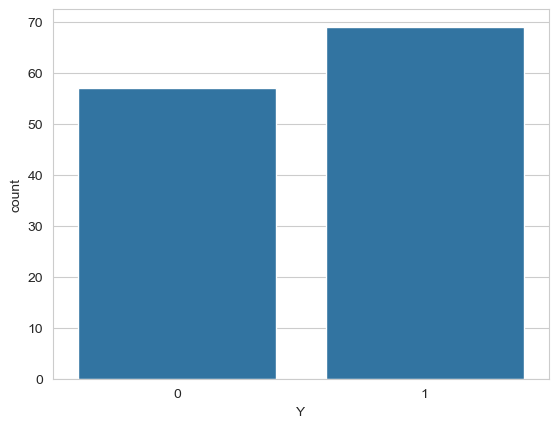

In [11]:
sns.set_style("whitegrid")
sns.countplot(x='Y',data=df)

In [13]:
df['Y'].value_counts()

Y
1    69
0    57
Name: count, dtype: int64

- The dataset is balanced.
- Plotting the question's responses against happy or unhappy customers.

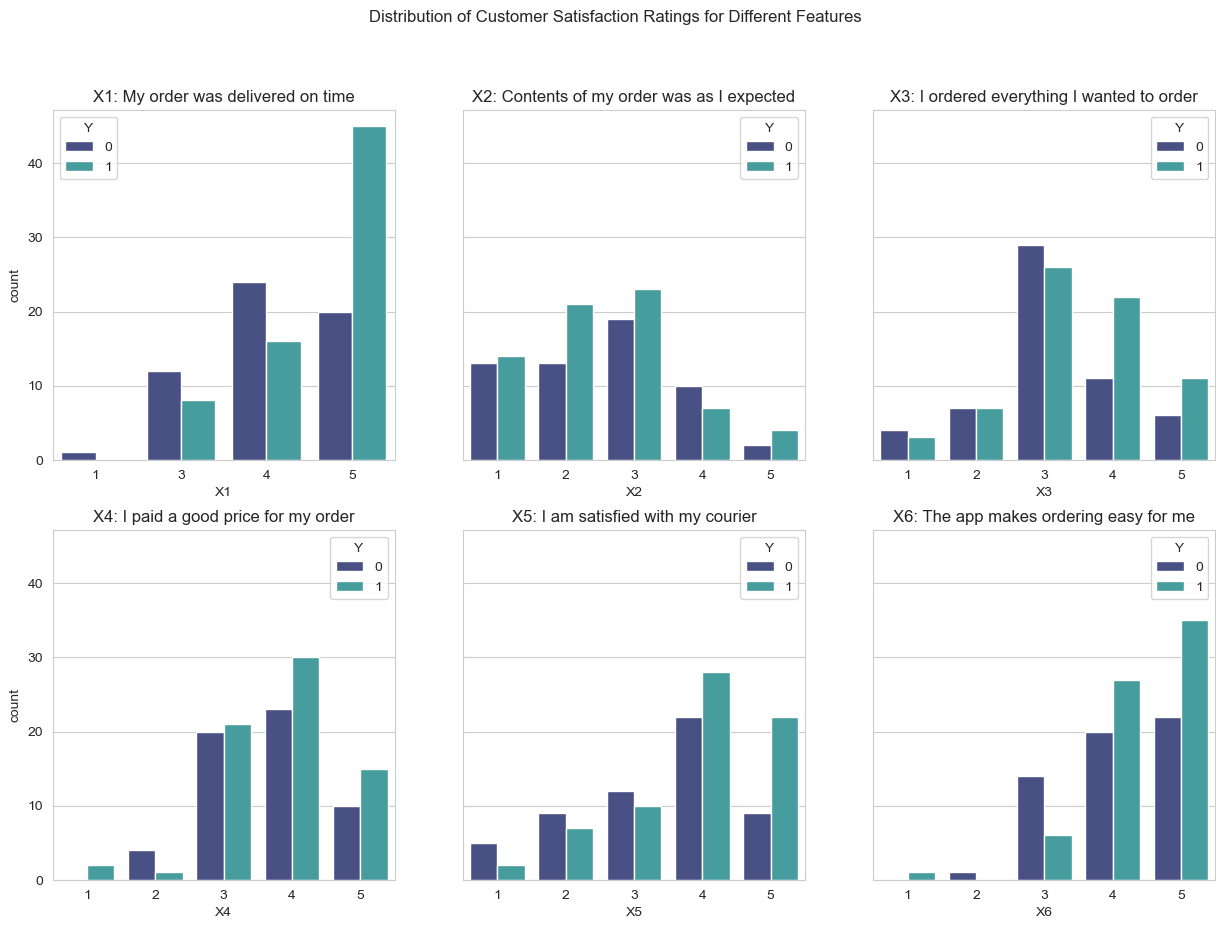

In [17]:
fig , axes = plt.subplots(2,3, sharey= True, figsize = (15,10))
fig.suptitle('Distribution of Customer Satisfaction Ratings for Different Features')

sns.countplot(ax = axes[0,0], x=df['X1'], hue=df['Y'], palette='mako')
axes[0,0].set_title('X1: My order was delivered on time')

sns.countplot(ax = axes[0,1], x=df['X2'], hue=df['Y'], palette='mako')
axes[0,1].set_title('X2: Contents of my order was as I expected')

sns.countplot(ax = axes[0,2], x=df['X3'], hue=df['Y'], palette='mako')
axes[0,2].set_title('X3: I ordered everything I wanted to order')

sns.countplot(ax = axes[1,0], x=df['X4'], hue=df['Y'], palette='mako')
axes[1,0].set_title('X4: I paid a good price for my order')

sns.countplot(ax = axes[1,1], x=df['X5'], hue=df['Y'], palette='mako')
axes[1,1].set_title('X5: I am satisfied with my courier')

sns.countplot(ax = axes[1,2], x=df['X6'], hue=df['Y'], palette='mako')
axes[1,2].set_title('X6: The app makes ordering easy for me')

plt.show();

In [19]:
X = df.drop(['Y'],axis=1)
y = df['Y']

<Axes: >

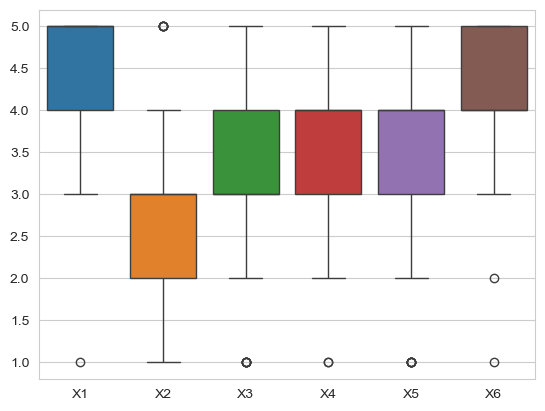

In [21]:
sns.boxplot(data=X)

<Axes: >

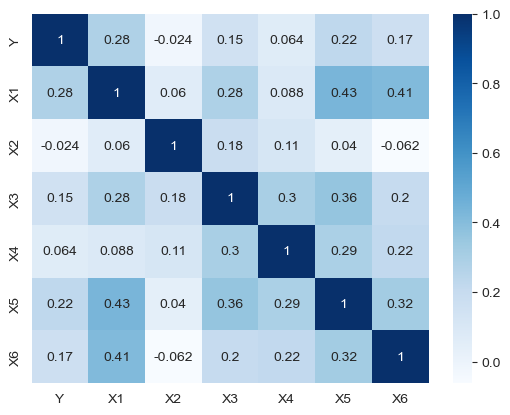

In [23]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

- Weak Correlations with the Target Variable (Y)

In [26]:
import random
#seed = random.randint(1000,9999)
#print(seed)
seed = 7352

### Train and Evaluate Models.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, recall_score,accuracy_score

### Logistic Regression

In [34]:
lr = LogisticRegression(class_weight='balanced',C=0.06,random_state=seed)
lr.fit(X_train,y_train)

y_proba = lr.predict_proba(X_test)[:,1]
threshold = 0.4
y_pred_threshold = (y_proba>=threshold).astype(int)
#y_pred = lr.predict(X_test)
print("Logistic Regression Recall: ", recall_score(y_test, y_pred_threshold))
print("Accuracy Score: ",accuracy_score(y_test,y_pred_threshold))
print("Classification Report: \n",classification_report(y_test, y_pred_threshold))

Logistic Regression Recall:  0.8666666666666667
Accuracy Score:  0.6538461538461539
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.36      0.47        11
           1       0.65      0.87      0.74        15

    accuracy                           0.65        26
   macro avg       0.66      0.62      0.61        26
weighted avg       0.66      0.65      0.63        26



### Support Vector Machines

In [37]:
svm = SVC(class_weight='balanced',C=7,random_state=seed)
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

print("Support Vector Machines Recall: ", recall_score(y_test, y_pred))
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test, y_pred))

Support Vector Machines Recall:  0.6666666666666666
Accuracy Score:  0.7307692307692307
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.83      0.67      0.74        15

    accuracy                           0.73        26
   macro avg       0.74      0.74      0.73        26
weighted avg       0.75      0.73      0.73        26



### Gaussian Naive Bayes

In [40]:
gnb = GaussianNB(var_smoothing=1)
gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes Recall: ", recall_score(y_test, y_pred))
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test, y_pred))

Gaussian Naive Bayes Recall:  0.5333333333333333
Accuracy Score:  0.5
Classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.45      0.43        11
           1       0.57      0.53      0.55        15

    accuracy                           0.50        26
   macro avg       0.49      0.49      0.49        26
weighted avg       0.51      0.50      0.50        26



### Decision Trees

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced',random_state=seed)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

print("Decision Tree Recall: ", recall_score(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Decision Tree Recall:  0.8
Accuracy Score:  0.7307692307692307
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.75      0.80      0.77        15

    accuracy                           0.73        26
   macro avg       0.72      0.72      0.72        26
weighted avg       0.73      0.73      0.73        26



### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=seed)
rf.fit(X_train, y_train)

y_proba = rf.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred_threshold = (y_proba >= threshold).astype(int)

print("Random Forest Recall: ", recall_score(y_test, y_pred_threshold))
print("Accuracy Score: ", accuracy_score(y_test, y_pred_threshold))
print("Classification Report: \n", classification_report(y_test, y_pred_threshold))

Random Forest Recall:  0.8666666666666667
Accuracy Score:  0.7307692307692307
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.55      0.63        11
           1       0.72      0.87      0.79        15

    accuracy                           0.73        26
   macro avg       0.74      0.71      0.71        26
weighted avg       0.73      0.73      0.72        26



### AdaBoost

In [53]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100,random_state=seed)
ada.fit(X_train, y_train)

#y_proba = ada.predict_proba(X_test)[:, 1]
#threshold = 0.4
#y_pred_threshold = (y_proba >= threshold).astype(int)
y_pred = ada.predict(X_test)
print("AdaBoost Recall: ", recall_score(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

AdaBoost Recall:  0.6
Accuracy Score:  0.5769230769230769
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           1       0.64      0.60      0.62        15

    accuracy                           0.58        26
   macro avg       0.57      0.57      0.57        26
weighted avg       0.58      0.58      0.58        26



### XGBoost

In [55]:
import xgboost as xgb
# Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False,random_state=seed)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
# Evaluate the model
print("XGBoost Recall: ", recall_score(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

XGBoost Recall:  0.8
Accuracy Score:  0.7307692307692307
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.75      0.80      0.77        15

    accuracy                           0.73        26
   macro avg       0.72      0.72      0.72        26
weighted avg       0.73      0.73      0.73        26



### Stacking Classifier

In [59]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import recall_score,accuracy_score,classification_report

# Define base learners with diverse models
base_learners = [#('lr',LogisticRegression(class_weight='balanced',C=0.06,random_state=seed)),
                 ('svm',SVC(class_weight='balanced',C=7,random_state=seed)),
                 ('gnb',GaussianNB(var_smoothing=1)),
                 #('dt',DecisionTreeClassifier(class_weight='balanced',random_state=seed)),
                #('rf',RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=seed)),
                #('ada',AdaBoostClassifier(n_estimators=100,algorithm='SAMME',random_state=seed)),
                ('xgb',xgb.XGBClassifier(eval_metric='logloss',random_state=seed))
                ]

# Define a meta-learner that combines the predictions of the base models
meta_learner = LogisticRegression(class_weight='balanced',C=0.06,random_state=seed)
#meta_learner = SVC(class_weight='balanced',C=7,random_state=seed)
#meta_learner = GaussianNB(var_smoothing=1)
#meta_learner = DecisionTreeClassifier(class_weight='balanced',random_state=seed)

# Create and train the Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_learners,final_estimator=meta_learner)

stacking_clf.fit(X_train,y_train)

# Predictions and evaluation for Stacking
y_pred_stack = stacking_clf.predict(X_test)
print("Stacking Classifier Recall: ", recall_score(y_test, y_pred_stack))
print("Accuracy Score: ", accuracy_score(y_test, y_pred_stack))
print("Classification Report: \n", classification_report(y_test, y_pred_stack))

Stacking Classifier Recall:  0.3333333333333333
Accuracy Score:  0.23076923076923078
Classification Report: 
               precision    recall  f1-score   support

           0       0.09      0.09      0.09        11
           1       0.33      0.33      0.33        15

    accuracy                           0.23        26
   macro avg       0.21      0.21      0.21        26
weighted avg       0.23      0.23      0.23        26



### Voting Classifier (Soft)

In [61]:
from sklearn.ensemble import VotingClassifier

base_learners_voting = [('lr',LogisticRegression(class_weight='balanced',C=0.06,random_state=seed)),
                 ('svm',SVC(class_weight='balanced',C=7,probability=True,random_state=seed)),
                 #('gnb',GaussianNB(var_smoothing=1)),
                 #('dt',DecisionTreeClassifier(class_weight='balanced',random_state=seed)),
                #('rf',RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=seed)),
                #('ada',AdaBoostClassifier(n_estimators=100,algorithm='SAMME',random_state=seed)),
                ('xgb',xgb.XGBClassifier(eval_metric='logloss',random_state=seed))
                ]

# Create and train the Voting Classifier
voting_clf = VotingClassifier(
    estimators=base_learners_voting,
    voting='soft'
)

voting_clf.fit(X_train, y_train)

# Predictions and evaluation for Voting
y_pred_vote = voting_clf.predict(X_test)
print("Voting Classifier Recall: ", recall_score(y_test, y_pred_vote))
print("Accuracy Score: ", accuracy_score(y_test, y_pred_vote))
print("Classification Report: \n", classification_report(y_test, y_pred_vote))

Voting Classifier Recall:  0.8
Accuracy Score:  0.7692307692307693
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.80      0.80      0.80        15

    accuracy                           0.77        26
   macro avg       0.76      0.76      0.76        26
weighted avg       0.77      0.77      0.77        26



### Voting Classifier (Hard)

In [63]:
base_learners_voting = [('lr',LogisticRegression(class_weight='balanced',C=0.06,random_state=seed)),
                 ('svm',SVC(class_weight='balanced',C=7,probability=True,random_state=seed)),
                 #('gnb',GaussianNB(var_smoothing=1)),
                 ('dt',DecisionTreeClassifier(class_weight='balanced',random_state=seed)),
                #('rf',RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=seed)),
                #('ada',AdaBoostClassifier(n_estimators=100,algorithm='SAMME',random_state=seed)),
                #('xgb',xgb.XGBClassifier(eval_metric='logloss',random_state=seed))
                ]

# Create and train the Voting Classifier
voting_clf = VotingClassifier(
    estimators=base_learners_voting,
    voting='hard'
)

voting_clf.fit(X_train, y_train)

# Predictions and evaluation for Voting
y_pred_vote = voting_clf.predict(X_test)
print("Voting Classifier Recall: ", recall_score(y_test, y_pred_vote))
print("Accuracy Score: ", accuracy_score(y_test, y_pred_vote))
print("Classification Report: \n", classification_report(y_test, y_pred_vote))

Voting Classifier Recall:  0.6666666666666666
Accuracy Score:  0.7692307692307693
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.91      0.67      0.77        15

    accuracy                           0.77        26
   macro avg       0.79      0.79      0.77        26
weighted avg       0.81      0.77      0.77        26



### Hyperopt Optimization on Voting Classifier(Hard)

In [66]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


In [68]:
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

# Define Voting Classifier
def create_voting_clf(svc_c, dt_max_depth):
    base_learners = [
        ('lr', LogisticRegression(class_weight='balanced',C=0.06,random_state=seed)),  # Linear Regression
        ('svc', SVC(C=svc_c, probability=False, class_weight='balanced', random_state=seed)),  # Support Vector Classifier
        ('dt', DecisionTreeClassifier(max_depth=int(dt_max_depth), random_state=seed,class_weight='balanced'))  # Decision Tree
    ]
    voting_clf_hard = VotingClassifier(
        estimators=base_learners,
        voting='hard'
    )
    return voting_clf_hard


# Objective function for Hyperopt
def objective(params):
    svc_c = params['svc_c']
    dt_max_depth = params['dt_max_depth']
    
    voting_clf_hard = create_voting_clf(svc_c, dt_max_depth)
    voting_clf_hard.fit(X_train, y_train)
    y_pred = voting_clf_hard.predict(X_test)
    recall = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall']
    
    return {'loss': -recall, 'status': STATUS_OK}


# Hyperopt space definition
space = {
    'svc_c': hp.uniform('svc_c', 0.1, 10),
    'dt_max_depth': hp.uniform('dt_max_depth', 3, 10)
}

# Run Hyperopt
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

print("Best parameters found:", best)

100%|███████████████████████████████████████████████| 50/50 [00:00<00:00, 51.39trial/s, best loss: -0.7692307692307693]
Best parameters found: {'dt_max_depth': 9.874419812373372, 'svc_c': 9.603218422448784}


In [70]:
# Re-train with the best parameters
best_voting_clf_hard = create_voting_clf(best['svc_c'], best['dt_max_depth'])
best_voting_clf_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.06,
                                                 class_weight='balanced',
                                                 random_state=7352)),
                             ('svc',
                              SVC(C=9.603218422448784, class_weight='balanced',
                                  random_state=7352)),
                             ('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=9,
                                                     random_state=7352))])

In [74]:
# Make predictions and evaluate
y_pred_final = best_voting_clf_hard.predict(X_test)

print("Voting Classifier(Hard) Recall: ", recall_score(y_test, y_pred_final))
print("Accuracy Score: ", accuracy_score(y_test, y_pred_final))
print("Classification Report: \n", classification_report(y_test, y_pred_final))

Voting Classifier(Hard) Recall:  0.6666666666666666
Accuracy Score:  0.7692307692307693
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.91      0.67      0.77        15

    accuracy                           0.77        26
   macro avg       0.79      0.79      0.77        26
weighted avg       0.81      0.77      0.77        26



- The results for Voting Classifier (Hard) are the same as even after applying Hyperopt Optimization.

### Feature Engineering
#### Feature Selection

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

In [123]:
dt = DecisionTreeClassifier(class_weight='balanced',random_state=seed)

# Initialize RFE with the Decision Tree model and the number of features to select
rfe = RFE(estimator=dt, n_features_to_select=4)

# Fit RFE
rfe.fit(X_train, y_train)

# Print the selected features
print("Selected features:", rfe.support_)
print("Ranking of features:", rfe.ranking_)

Selected features: [False  True  True  True  True False]
Ranking of features: [2 1 1 1 1 3]


In [125]:
X_updated = df[['X2','X3','X4','X5']]

In [127]:
X_train_updated,X_test_updated,y_train,y_test = train_test_split(X_updated,y,test_size=0.2,random_state=seed)

In [115]:
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

# Define Voting Classifier
def create_voting_clf(svc_c, dt_max_depth):
    base_learners = [
        ('lr', LogisticRegression(class_weight='balanced',C=0.06,random_state=seed)),  # Linear Regression
        ('svc', SVC(C=svc_c, probability=False, class_weight='balanced', random_state=seed)),  # Support Vector Classifier
        ('dt', DecisionTreeClassifier(max_depth=int(dt_max_depth), random_state=seed,class_weight='balanced'))  # Decision Tree
    ]
    voting_clf_hard = VotingClassifier(
        estimators=base_learners,
        voting='hard'
    )
    return voting_clf_hard


# Objective function for Hyperopt
def objective(params):
    svc_c = params['svc_c']
    dt_max_depth = params['dt_max_depth']
    
    voting_clf_hard = create_voting_clf(svc_c, dt_max_depth)
    voting_clf_hard.fit(X_train_updated, y_train)
    y_pred = voting_clf_hard.predict(X_test_updated)
    recall = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall']
    
    return {'loss': -recall, 'status': STATUS_OK}


# Hyperopt space definition
space = {
    'svc_c': hp.uniform('svc_c', 0.1, 10),
    'dt_max_depth': hp.uniform('dt_max_depth', 3, 10)
}

# Run Hyperopt
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

print("Best parameters found:", best)

100%|███████████████████████████████████████████████| 50/50 [00:00<00:00, 61.33trial/s, best loss: -0.7692307692307693]
Best parameters found: {'dt_max_depth': 7.179033087868419, 'svc_c': 9.871534405984013}


In [131]:
# Re-train with the best parameters
best_voting_clf_hard = create_voting_clf(best['svc_c'], best['dt_max_depth'])
best_voting_clf_hard.fit(X_train_updated, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.06,
                                                 class_weight='balanced',
                                                 random_state=7352)),
                             ('svc',
                              SVC(C=9.871534405984013, class_weight='balanced',
                                  random_state=7352)),
                             ('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=7,
                                                     random_state=7352))])

In [133]:
# Make predictions and evaluate
y_pred_final = best_voting_clf_hard.predict(X_test_updated)

print("Voting Classifier(Hard) Recall: ", recall_score(y_test, y_pred_final))
print("Accuracy Score: ", accuracy_score(y_test, y_pred_final))
print("Classification Report: \n", classification_report(y_test, y_pred_final))

Voting Classifier(Hard) Recall:  0.6666666666666666
Accuracy Score:  0.7692307692307693
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.91      0.67      0.77        15

    accuracy                           0.77        26
   macro avg       0.79      0.79      0.77        26
weighted avg       0.81      0.77      0.77        26



- After performing Feature selection the results are better with Hyperopt Optimization.

### Conclusion
- The Voting Classifier with Hard Voting proved to be the best model due to its high recall for unhappy customers (0.91) and its effective performance with fewer features. This approach meets the project's goal of accurately identifying unhappy customers to address issues proactively. The model’s performance and reduced feature set contribute to both operational efficiency and computational effectiveness.